In [1]:
import numpy as np
from matplotlib import pyplot as pl

# Perceptron

O perceptron é um simples algorítmo de classificação binária, que funciona sempre que os dados são linearmente separáveis.

Entramos com $N$ dados de $d$ dimensões

Input: $\vec{x_{i}}=(x_{1},x_{2},...,x_{d})$

Output: $y=\pm 1$

# Pasos

Definimos o vetor de dados estendido: $ x_{i}=(1,\vec{x_{i}}) $

Os pesos: $ w =(w_{0},w_{1},...,w_{d}) $

A Função de ativação: $h=sign(w\cdot x_{i})$

0 - Definimos o conjunto de treinamento $D=[(x_{i},y_{i}),i=1,...,N]$ e escolhemos um peso inicial $w$

1 - Procuramos um par em $D$ tal que: $sign(w \cdot x_{i})\neq y_{i}$

2 - Atualizar o peso: $w=w+{y_{i}}\cdot{x_{i}}$

3 - Repetir até que todos os pares $(x_{i},y_{i})$ obedeçam $sign(w \cdot x_{i}) = y_{i}$

In [6]:
class percep:
    
    def __init__(self, x,y,w):
        # define a dimensão a partir do vetor imput x
        self.dim = len(x[0])
        # define numero de dados de treino
        self.n = len(y)
        
    
    # função de ativação sinal (positivo ou negativo)
    def h_sign(self,x,w):
        return np.sign(np.dot(w,x))

    
    # aprendizado
    def learn(self,x,y,w):
        d = self.n
        i = 0
        c = 0
        
        # d é o nª de dados que estão sendo classificados erroneamente
        while d != 0:
            if i == self.n:
                i = 0
            
            # cria o vetor extendido
            X = np.concatenate((1,x[i]),axis=None)
            
            # segue os passos 1,2,3
            if self.h_sign(X,w) != y[i]:
                # atualiza os pesos
                w = w + y[i]*X
                d = len(x)
                c = c + 1
            else:
                d = d - 1
                
            # se demorar muito para o programa
            if c>500:
                print("Acho que não converge... \n :(")
                return 0
        
            i=i+1
            
        # retorna os pesos que faz funcionar e o nª de iterações que demorou
        return w, c
    
    
    #Retorna a classe de um único imput
    def testa(self,q,x,y,w):
        W=self.learn(x,y,w)[0]
        Q=np.concatenate((1,q),axis=None)
        
        # classifica
        if self.h_sign(Q,W)==1:
            print(q,'é azul!')
        if self.h_sign(Q,W)==-1:
            print(q,'é vermelho!')
        if self.h_sign(Q,W)==0:
            print('Sla tio...')
    
    
    # define a reta (ou plano ou hyperplano dependedo 
    # das dimensões dos dados que divide os pontos
    def reta(self,x,y,w):
        W=self.learn(x,y,w)[0]
        m=len(W)
        
        X=np.zeros([self.dim,self.n])
        for i in range (self.dim):
            X[i]=x[:,i]
        
        z=np.zeros([self.dim-1,100])
        for i in range (self.dim-1):
            z[i]=np.linspace(np.min(X[i])-0.5,np.max(X[i])+0.5,100)
        
        Z=np.zeros(100)
        for k in range (100):
            Z[k]=-W[0]/W[m-1]
            for i in range(self.dim-1):
                Z[k]=Z[k]-W[i+1]*z[i][k]/W[m-1]
                
        return z,Z
        
    
    #plota (funciona só pra 2D)
    def desenhar_r(self,x,y,w):
        X=x[:,0]
        Y=x[:,1]
        
        reta=self.reta(x,y,w)
        z=reta[0][0]
        Z=reta[1]
        
        for i in range (len(X)):
            if y[i]==1:
                # azul
                pl.scatter(X[i],Y[i],c='b')
            else:
                # vermelho
                pl.scatter(X[i],Y[i],c='r')
        
        pl.plot(z,Z)
        pl.ylim(np.min(Y)-0.5,np.max(Y)+0.5)
        
    
    #desenha só os pontos (só 2D)
    def pontos(self,x,y):
        X=x[:,0]
        Y=x[:,1]
        
        for i in range (len(X)):
            if y[i]==1:
                # azul
                pl.scatter(X[i],Y[i],c='b')
            else:
                # vermelho
                pl.scatter(X[i],Y[i],c='r')
        
        pl.xlim(np.min(X)-0.5,np.max(X)+0.5)
        pl.ylim(np.min(Y)-0.5,np.max(Y)+0.5)

# Exemplo 2D

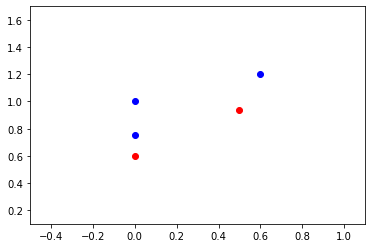

In [4]:
# sendo o imput 
x = np.array([[0,0.75],[0,1],[0.6,1.2],[0.5,0.94],[0.0,0.6]])
# output
y = [1,1,1,-1,-1]
#print(x,y)

# pesos iniciais
w = (-1,1,1)

cor = percep(x,y,w)
cor.pontos(x,y)

iterações:  141


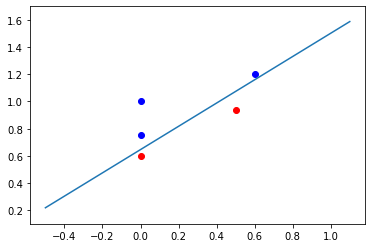

In [5]:
print("iterações: ",cor.learn(x,y,w)[1])
cor.desenhar_r(x,y,w)

In [7]:
# testa um outro ponto
q = (-0.2,0.5)

cor.testa(q,x,y,w)

(-0.2, 0.5) é azul!
